<a href="https://colab.research.google.com/github/Swastik02aug/SML-Regression-Capstone-Project/blob/main/project(yes_bank).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**


**Importing all required libraries.**

In [30]:
import numpy as np                                     # numerical computations
import pandas as pd                                    #data manipulation
import matplotlib.pyplot as plt                        #visulaisations with plot
%matplotlib inline
import seaborn as sns
import plotly.express as px

from numpy import math
from sklearn.preprocessing import (MinMaxScaler,       # scale the data
StandardScaler)     
from sklearn.model_selection import train_test_split   # split train and test data
from sklearn.model_selection import (cross_val_score,  # split train and test data on a timeseries
TimeSeriesSplit)

from sklearn.linear_model import LinearRegression      # regression model
from xgboost import XGBRegressor                       # xgboost model
from sklearn.ensemble import RandomForestRegressor     # random forest model
from sklearn.svm import SVR                            # support vector regressor
from sklearn.linear_model import (Lasso, Ridge,        # regularization
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)

from sklearn.model_selection import GridSearchCV       # grid search to optimize parameters
from sklearn.metrics import (r2_score,                 # import required metrics
mean_squared_error,  mean_absolute_percentage_error, 
mean_absolute_error)

from datetime import datetime                          # to convert to date
from statsmodels.tsa.arima_model import ARIMA          # to build ARIMA
from prophet import Prophet                            # to build prophet

from dateutil.relativedelta import relativedelta       # working with dates with style
from datetime import datetime                          # computational cost
from scipy.optimize import minimize                    # for function minimization
import copy                                            # create copie


from statsmodels.tsa.stattools import adfuller         # statistics and econometrics
import statsmodels.formula.api as smf                  
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs


import warnings                                        # do not disturb mode
warnings.filterwarnings('ignore')

In [3]:
#mounting drive for importing data set from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/capstone project 2(yes bank)/data_YesBank_StockPrices.csv')

**WRANGLING OF THE DATA:**

In [5]:
#HEAD FUCTION IS USED TO PRINT OUT THE FIRST FIVE ROWS OF THRE DATA SETS
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [6]:
#DESCRIBE METHOD IS USE PROVIDES THE COUNT ,MEAN,MEDIAN,,STD,MIN ETC VALUES
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [7]:
#NUNIQUE IS USED TO PROVIDES THE NUMBERS OF UNIQUES VALUES PRESENT IN EACH COLUMN
dataset.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

In [8]:
#DTYPES IS USED TO PROVIDES DATA TYPES OF EACH COLUMN VALUE
dataset.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [9]:
#INFO IS USED TO PROVIDES COUNT,DTYPE,AND NULL OR NON COLUMN VALUES
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [10]:
#IT IS USED TO FIND OUT THE SUM OF ALL NULL VALUES
dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

**->**From the given data set we find that there is no null values are present .

In [11]:
#IT IS USED TO FIND OT THE NUMBERS OF ROWS AND COLUMN OF THE DATA
dataset.shape

(185, 5)

**->**From the given data set we find that there are 185 rows and 5 columns .And all the given values are integer and float except date(object i.e; string) ,so we have to covert that into date format.

In [12]:
# convert string object to datetime object
dataset['Date'] = dataset['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

In [13]:
dataset['Date']

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

In [14]:
dataset.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


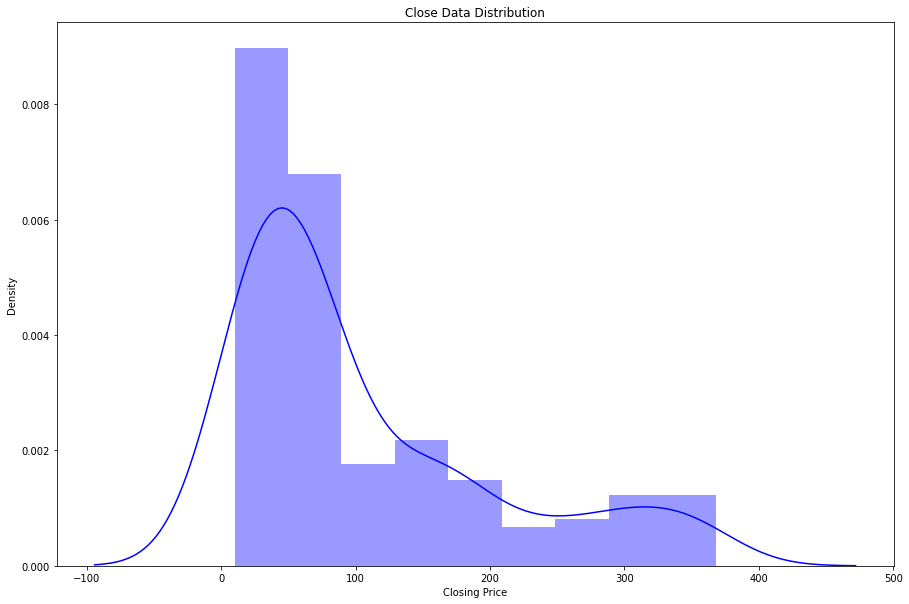

In [26]:
# Dependent variable 'Closing price'
plt.figure(figsize=(15,10))
sns.distplot(dataset['Close'],color="b")
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')
plt.show()

**->**From the distribution plot of the dependent variable 'close' price we find that 'close' price distribution curve is slighltly left skewed.

In [34]:
#finding month wise distribution of close price
fig = px.line(dataset,dataset['Date'], dataset['Close'], title='Monthly closing price')
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Closing price'),
    autosize=False,
    width=1400,
    height=400)

fig.show()

**->**From the we find the closing price is high between the year 2016 to 2020.

Index(['Open', 'High', 'Low', 'Close'], dtype='object')


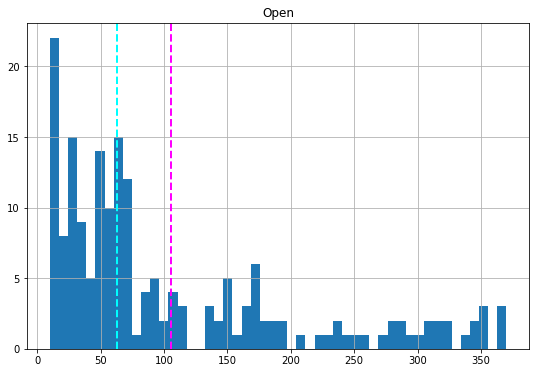

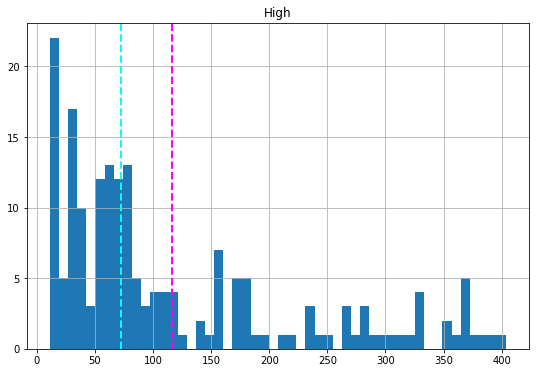

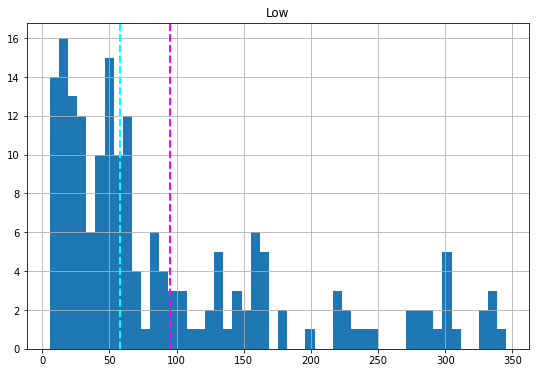

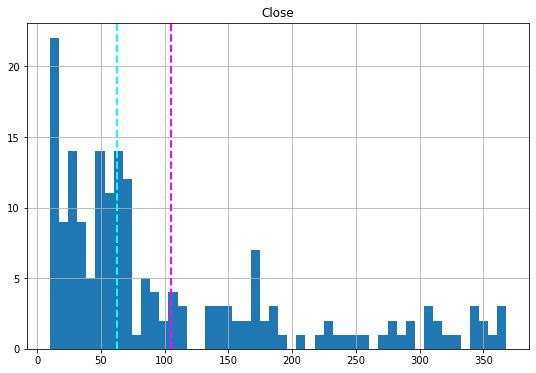

In [37]:
# Check for skewness in the dataset
numeric_features = dataset.describe().columns
print(numeric_features)
for col in numeric_features[0:4]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

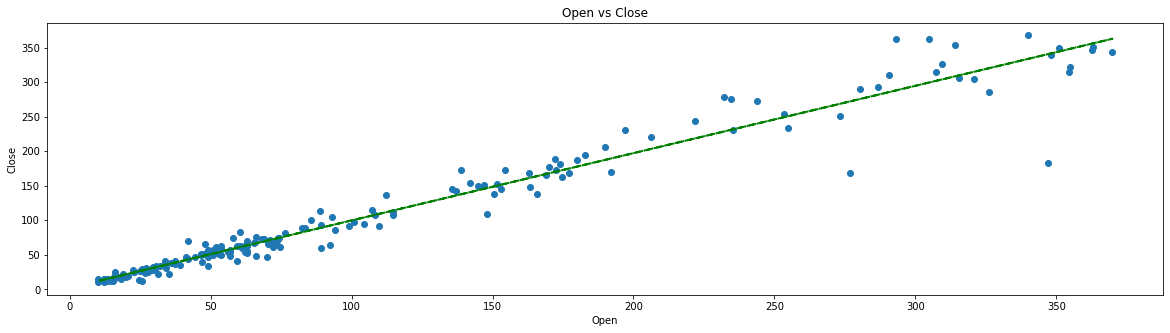

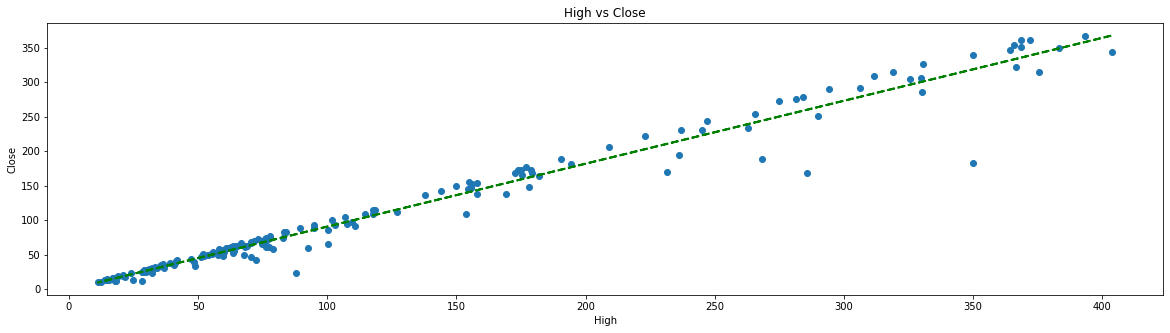

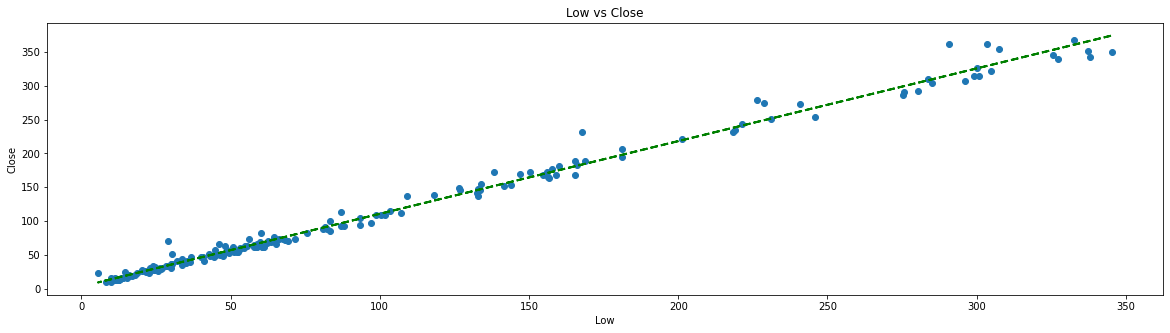

In [41]:
# scatter plot to see the relationship between dependent & independent variables
for col in dataset.describe().columns[:-1]:
  fig = plt.figure(figsize=(20,5))
  ax = fig.gca()

  plt.scatter(dataset[col], dataset['Close'])
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('{} vs Close'.format(col))

  z = np.polyfit(dataset[col],dataset['Close'], 1)
  y_hat = np.poly1d(z)(dataset[col])
  plt.plot(dataset[col], y_hat, "g--", lw=2)

  plt.show()

**->**From all the scatter plot we find that each independent variable are changes linearly with dependent variable.

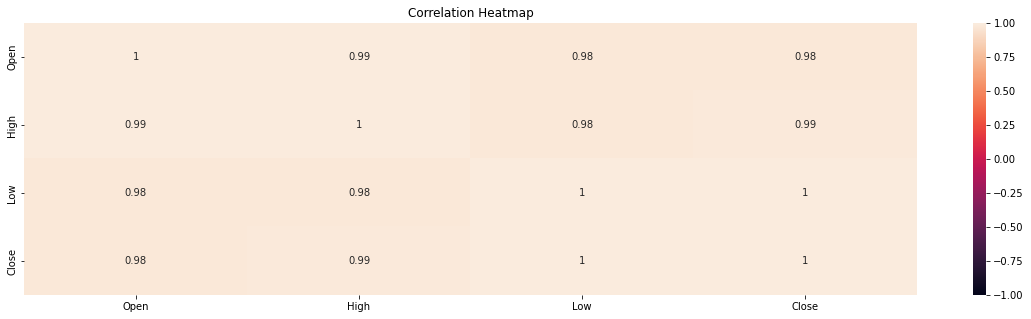

In [17]:
# check for existence of corelation
plt.figure(figsize=(20,5))
plt.title('Correlation Heatmap')
cor = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, cmap=None, annot=True )

**->**From the heat map we find correlation between the independent variables.

**->**Hence all the independent variable are highly correlated with each other,so we takes any one variables from them.

In [19]:
# Creating a new feature based on average of other features in the dataset
dataset['im'] = dataset[['Open', 'High', 'Low']].mean(axis=1).round(2)
dataset.head()

,Date,Open,High,Low,Close,im
0,2005-07-01,13.00,14.00,11.25,12.46,12.75
1,2005-08-01,12.58,14.88,12.55,13.42,13.34
2,2005-09-01,13.48,14.87,12.27,13.30,13.54
3,2005-10-01,13.20,14.47,12.40,12.99,13.36
4,2005-11-01,13.35,13.88,12.88,13.41,13.37


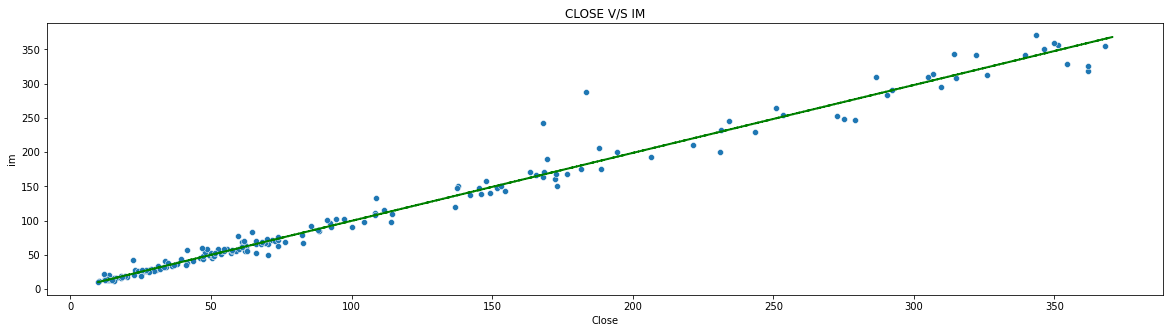

In [28]:
#ploting the scatter plot b/w dependent and independent variables
plt.figure(figsize=(20,5))
plt.title('CLOSE V/S IM')

sns.scatterplot(dataset['Close'],dataset['im'])

z = np.polyfit(dataset['im'],dataset['Close'], 1)
y_hat = np.poly1d(z)(dataset['im'])
plt.plot(dataset['im'], y_hat, "g--", lw=2)

plt.show()


**->**SCATTER PLOT IS TO REPRESENT THE LINEARITY B/W THE DEPENDENT AND INDEPENDENT VARIABLES.

->And linearity between the 'im' and 'close'is hgh.

In [ ]:
# Hence the given data is small in size so it necesssary to performs 5 fold time-series cross-validation 
tscv = TimeSeriesSplit(n_splits=5)

In [31]:
# function for splitting time-series dataset
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    scaler = StandardScaler()
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [32]:
# choose appropriate dependent and independent variables
y = dataset.dropna().Close
X = dataset.dropna().drop(['Date','Close','Open','High','Low'], axis=1)

In [33]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.2)